In [1]:
from neo_access import *
from get_response_prop import *
#from get_response_prop import calculate_bandwidth,response_detection_core#,build_pdf
import numpy as np
import matplotlib.pyplot as plt
from neo.io import PickleIO
import pandas as pd
import os
import glob

from scipy.stats import wilcoxon
import numpy.ma as ma

def cut_data(selection,data,start_rel = None,end_rel = None,trials = None,samplingrate = None):

    '''function needs df row as input. also data needs to be 1d
        start_rel & end_rel means relative to stimulus start'''

    start = selection.pre[0] -start_rel
    end =  selection.pre[0] +end_rel
    #print(start)
    #print(end)

    raster = np.zeros([trials,int((end-start)*samplingrate)])
    #print(raster.shape)
    times = (data[:,0]/samplingrate)
    times_inx = data[:,1]
    times_cut = ((times[(times> start)&(times< end)]*samplingrate)-start*samplingrate).astype(int)
    times_inx_cut = times_inx[(times> start)&(times< end)].astype(int)
    raster[times_inx_cut,times_cut] = 1
    #cumsum_trials = np.cumsum(raster,axis=1)
    cumsum = np.sum((np.cumsum(raster,axis=1)),axis = 0)

    return raster,np.sort(times_cut),cumsum

In [2]:
working_directory = r'Y:\Data\PB_DATA\Neruopixel_ProcessedData\JPO-001991\Pre_CNO\2019-10-31_12-01-40'
exp_name = 'JPO-001991_preCNO_probe1_001'
structure = 'VPL'
sorting_number = 1

In [3]:
if structure == 'VPL':
    flag = 0
else:
    flag = 2

path = os.path.join(working_directory,r"experiment1\recording1\continuous\Neuropix-PXI-100.{}\Sorting\{}".format(flag,sorting_number))
metrics = pd.read_csv(os.path.join(path,"metrics.csv"),index_col=0)
df=pd.read_csv(os.path.join(path , 'cluster_KSLabel.tsv'),header=0, delim_whitespace=True)

mask = df['cluster_id'].isin(metrics['cluster_id'])
metrics['quality'] = df.loc[mask,'KSLabel']

nn_hit_rate_thr = 0.8
isi_thr = 0.2
amplitude_cutoff_thr = 0.1
isolation_distance_thr = 50
lratio_thr = 0.2
fr_ration = 0.1


metrics_clean= metrics[(metrics.isi_viol < isi_thr) & (metrics.amplitude_cutoff < amplitude_cutoff_thr)&
               (metrics.isolation_distance > isolation_distance_thr)&
               (metrics.l_ratio.dropna() < lratio_thr)&
               (metrics.nn_hit_rate.dropna() > nn_hit_rate_thr)&
               (metrics.quality == 'good')]

In [4]:
metrics.shape

(551, 27)

In [5]:

exp_id = exp_name.split('_')[-1]
wd = os.path.join(working_directory,'SpikeSortingResults_Probe_'+structure)


dataframe = pd.read_pickle(glob.glob(os.path.join(wd,'*df*.pkl'))[0])

trials = int(dataframe.trials[0])
sweeplength = int(dataframe.sweeplength[0])
samplerate = 30000



os.chdir(wd)
io = PickleIO(filename=os.path.basename(glob.glob(os.path.join(wd,'*data*.pkl'))[0]))
blk2 = io.read()[0]

selection = dataframe[(dataframe["cluster"] == '10') & (dataframe["expID"] == exp_id)]
data = get_all_data(blk2,selection,raster=True,timestamps=True,spikes=True,aisignal=True)


amps = []
[amps.append(np.mean(np.mean(data[3][i],axis=1),axis =1)) for i in range(len(data[3]))]


selection = dataframe[(dataframe['expID'] == exp_id)]
data = get_all_data(blk2,selection,raster=True,timestamps=True,spikes=True,aisignal=True)
cluster_ids = list(np.unique(metrics_clean.index.values))
cluster_ids = list(map(str,cluster_ids))
baselines = list(np.unique(selection['basetemp'].values))

['0_11', '0_0', '0_1', '0_0']
['0_12', '0_1', '0_1', '0_1']
['0_13', '0_2', '0_1', '0_2']
['0_14', '0_3', '0_1', '0_3']
['0_15', '0_4', '0_1', '0_4']
['0_16', '0_5', '0_1', '0_5']
['0_17', '0_6', '0_1', '0_6']
['0_18', '0_7', '0_1', '0_7']
['0_19', '0_8', '0_1', '0_8']
['0_20', '0_9', '0_1', '0_9']
['0_21', '0_10', '0_1', '0_10']
['0_0', '0_0', '0_0', '0_0']
['0_1', '0_1', '0_0', '0_1']
['0_2', '0_2', '0_0', '0_2']
['0_3', '0_3', '0_0', '0_3']
['0_4', '0_4', '0_0', '0_4']
['0_5', '0_5', '0_0', '0_5']
['0_6', '0_6', '0_0', '0_6']
['0_7', '0_7', '0_0', '0_7']
['0_8', '0_8', '0_0', '0_8']
['0_9', '0_9', '0_0', '0_9']
['0_10', '0_10', '0_0', '0_10']
['0_11', '0_0', '0_1', '0_0']
['0_12', '0_1', '0_1', '0_1']
['0_13', '0_2', '0_1', '0_2']
['0_14', '0_3', '0_1', '0_3']
['0_15', '0_4', '0_1', '0_4']
['0_16', '0_5', '0_1', '0_5']
['0_17', '0_6', '0_1', '0_6']
['0_18', '0_7', '0_1', '0_7']
['0_19', '0_8', '0_1', '0_8']
['0_20', '0_9', '0_1', '0_9']
['0_21', '0_10', '0_1', '0_10']
['0_22', '0_0'

['0_251', '0_9', '0_22', '0_9']
['0_252', '0_10', '0_22', '0_10']
['0_253', '0_0', '0_23', '0_0']
['0_254', '0_1', '0_23', '0_1']
['0_255', '0_2', '0_23', '0_2']
['0_256', '0_3', '0_23', '0_3']
['0_257', '0_4', '0_23', '0_4']
['0_258', '0_5', '0_23', '0_5']
['0_259', '0_6', '0_23', '0_6']
['0_260', '0_7', '0_23', '0_7']
['0_261', '0_8', '0_23', '0_8']
['0_262', '0_9', '0_23', '0_9']
['0_263', '0_10', '0_23', '0_10']
['0_264', '0_0', '0_24', '0_0']
['0_265', '0_1', '0_24', '0_1']
['0_266', '0_2', '0_24', '0_2']
['0_267', '0_3', '0_24', '0_3']
['0_268', '0_4', '0_24', '0_4']
['0_269', '0_5', '0_24', '0_5']
['0_270', '0_6', '0_24', '0_6']
['0_271', '0_7', '0_24', '0_7']
['0_272', '0_8', '0_24', '0_8']
['0_273', '0_9', '0_24', '0_9']
['0_274', '0_10', '0_24', '0_10']
['0_275', '0_0', '0_25', '0_0']
['0_276', '0_1', '0_25', '0_1']
['0_277', '0_2', '0_25', '0_2']
['0_278', '0_3', '0_25', '0_3']
['0_279', '0_4', '0_25', '0_4']
['0_280', '0_5', '0_25', '0_5']
['0_281', '0_6', '0_25', '0_6']
['

['0_505', '0_10', '0_45', '0_10']
['0_506', '0_0', '0_46', '0_0']
['0_507', '0_1', '0_46', '0_1']
['0_508', '0_2', '0_46', '0_2']
['0_509', '0_3', '0_46', '0_3']
['0_510', '0_4', '0_46', '0_4']
['0_511', '0_5', '0_46', '0_5']
['0_512', '0_6', '0_46', '0_6']
['0_513', '0_7', '0_46', '0_7']
['0_514', '0_8', '0_46', '0_8']
['0_515', '0_9', '0_46', '0_9']
['0_516', '0_10', '0_46', '0_10']
['0_517', '0_0', '0_47', '0_0']
['0_518', '0_1', '0_47', '0_1']
['0_519', '0_2', '0_47', '0_2']
['0_520', '0_3', '0_47', '0_3']
['0_521', '0_4', '0_47', '0_4']
['0_522', '0_5', '0_47', '0_5']
['0_523', '0_6', '0_47', '0_6']
['0_524', '0_7', '0_47', '0_7']
['0_525', '0_8', '0_47', '0_8']
['0_526', '0_9', '0_47', '0_9']
['0_527', '0_10', '0_47', '0_10']
['0_528', '0_0', '0_48', '0_0']
['0_529', '0_1', '0_48', '0_1']
['0_530', '0_2', '0_48', '0_2']
['0_531', '0_3', '0_48', '0_3']
['0_532', '0_4', '0_48', '0_4']
['0_533', '0_5', '0_48', '0_5']
['0_534', '0_6', '0_48', '0_6']
['0_535', '0_7', '0_48', '0_7']
['

['0_759', '0_0', '0_69', '0_0']
['0_760', '0_1', '0_69', '0_1']
['0_761', '0_2', '0_69', '0_2']
['0_762', '0_3', '0_69', '0_3']
['0_763', '0_4', '0_69', '0_4']
['0_764', '0_5', '0_69', '0_5']
['0_765', '0_6', '0_69', '0_6']
['0_766', '0_7', '0_69', '0_7']
['0_767', '0_8', '0_69', '0_8']
['0_768', '0_9', '0_69', '0_9']
['0_769', '0_10', '0_69', '0_10']
['0_770', '0_0', '0_70', '0_0']
['0_771', '0_1', '0_70', '0_1']
['0_772', '0_2', '0_70', '0_2']
['0_773', '0_3', '0_70', '0_3']
['0_774', '0_4', '0_70', '0_4']
['0_775', '0_5', '0_70', '0_5']
['0_776', '0_6', '0_70', '0_6']
['0_777', '0_7', '0_70', '0_7']
['0_778', '0_8', '0_70', '0_8']
['0_779', '0_9', '0_70', '0_9']
['0_780', '0_10', '0_70', '0_10']
['0_781', '0_0', '0_71', '0_0']
['0_782', '0_1', '0_71', '0_1']
['0_783', '0_2', '0_71', '0_2']
['0_784', '0_3', '0_71', '0_3']
['0_785', '0_4', '0_71', '0_4']
['0_786', '0_5', '0_71', '0_5']
['0_787', '0_6', '0_71', '0_6']
['0_788', '0_7', '0_71', '0_7']
['0_789', '0_8', '0_71', '0_8']
['0_

['0_1013', '0_1', '0_92', '0_1']
['0_1014', '0_2', '0_92', '0_2']
['0_1015', '0_3', '0_92', '0_3']
['0_1016', '0_4', '0_92', '0_4']
['0_1017', '0_5', '0_92', '0_5']
['0_1018', '0_6', '0_92', '0_6']
['0_1019', '0_7', '0_92', '0_7']
['0_1020', '0_8', '0_92', '0_8']
['0_1021', '0_9', '0_92', '0_9']
['0_1022', '0_10', '0_92', '0_10']
['0_1023', '0_0', '0_93', '0_0']
['0_1024', '0_1', '0_93', '0_1']
['0_1025', '0_2', '0_93', '0_2']
['0_1026', '0_3', '0_93', '0_3']
['0_1027', '0_4', '0_93', '0_4']
['0_1028', '0_5', '0_93', '0_5']
['0_1029', '0_6', '0_93', '0_6']
['0_1030', '0_7', '0_93', '0_7']
['0_1031', '0_8', '0_93', '0_8']
['0_1032', '0_9', '0_93', '0_9']
['0_1033', '0_10', '0_93', '0_10']
['0_1034', '0_0', '0_94', '0_0']
['0_1035', '0_1', '0_94', '0_1']
['0_1036', '0_2', '0_94', '0_2']
['0_1037', '0_3', '0_94', '0_3']
['0_1038', '0_4', '0_94', '0_4']
['0_1039', '0_5', '0_94', '0_5']
['0_1040', '0_6', '0_94', '0_6']
['0_1041', '0_7', '0_94', '0_7']
['0_1042', '0_8', '0_94', '0_8']
['0_10

['0_1255', '0_1', '0_114', '0_1']
['0_1256', '0_2', '0_114', '0_2']
['0_1257', '0_3', '0_114', '0_3']
['0_1258', '0_4', '0_114', '0_4']
['0_1259', '0_5', '0_114', '0_5']
['0_1260', '0_6', '0_114', '0_6']
['0_1261', '0_7', '0_114', '0_7']
['0_1262', '0_8', '0_114', '0_8']
['0_1263', '0_9', '0_114', '0_9']
['0_1264', '0_10', '0_114', '0_10']
['0_1265', '0_0', '0_115', '0_0']
['0_1266', '0_1', '0_115', '0_1']
['0_1267', '0_2', '0_115', '0_2']
['0_1268', '0_3', '0_115', '0_3']
['0_1269', '0_4', '0_115', '0_4']
['0_1270', '0_5', '0_115', '0_5']
['0_1271', '0_6', '0_115', '0_6']
['0_1272', '0_7', '0_115', '0_7']
['0_1273', '0_8', '0_115', '0_8']
['0_1274', '0_9', '0_115', '0_9']
['0_1275', '0_10', '0_115', '0_10']
['0_1276', '0_0', '0_116', '0_0']
['0_1277', '0_1', '0_116', '0_1']
['0_1278', '0_2', '0_116', '0_2']
['0_1279', '0_3', '0_116', '0_3']
['0_1280', '0_4', '0_116', '0_4']
['0_1281', '0_5', '0_116', '0_5']
['0_1282', '0_6', '0_116', '0_6']
['0_1283', '0_7', '0_116', '0_7']
['0_1284',

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


['0_2041', '0_6', '0_185', '0_6']
['0_2042', '0_7', '0_185', '0_7']
['0_2043', '0_8', '0_185', '0_8']
['0_2044', '0_9', '0_185', '0_9']
['0_2045', '0_10', '0_185', '0_10']
['0_2046', '0_0', '0_186', '0_0']
['0_2047', '0_1', '0_186', '0_1']
['0_2048', '0_2', '0_186', '0_2']
['0_2049', '0_3', '0_186', '0_3']
['0_2050', '0_4', '0_186', '0_4']
['0_2051', '0_5', '0_186', '0_5']
['0_2052', '0_6', '0_186', '0_6']
['0_2053', '0_7', '0_186', '0_7']
['0_2054', '0_8', '0_186', '0_8']
['0_2055', '0_9', '0_186', '0_9']
['0_2056', '0_10', '0_186', '0_10']
['0_2057', '0_0', '0_187', '0_0']
['0_2058', '0_1', '0_187', '0_1']
['0_2059', '0_2', '0_187', '0_2']
['0_2060', '0_3', '0_187', '0_3']
['0_2061', '0_4', '0_187', '0_4']
['0_2062', '0_5', '0_187', '0_5']
['0_2063', '0_6', '0_187', '0_6']
['0_2064', '0_7', '0_187', '0_7']
['0_2065', '0_8', '0_187', '0_8']
['0_2066', '0_9', '0_187', '0_9']
['0_2067', '0_10', '0_187', '0_10']
['0_2068', '0_0', '0_188', '0_0']
['0_2069', '0_1', '0_188', '0_1']
['0_2070

['0_2280', '0_3', '0_207', '0_3']
['0_2281', '0_4', '0_207', '0_4']
['0_2282', '0_5', '0_207', '0_5']
['0_2283', '0_6', '0_207', '0_6']
['0_2284', '0_7', '0_207', '0_7']
['0_2285', '0_8', '0_207', '0_8']
['0_2286', '0_9', '0_207', '0_9']
['0_2287', '0_10', '0_207', '0_10']
['0_2288', '0_0', '0_208', '0_0']
['0_2289', '0_1', '0_208', '0_1']
['0_2290', '0_2', '0_208', '0_2']
['0_2291', '0_3', '0_208', '0_3']
['0_2292', '0_4', '0_208', '0_4']
['0_2293', '0_5', '0_208', '0_5']
['0_2294', '0_6', '0_208', '0_6']
['0_2295', '0_7', '0_208', '0_7']
['0_2296', '0_8', '0_208', '0_8']
['0_2297', '0_9', '0_208', '0_9']
['0_2298', '0_10', '0_208', '0_10']
['0_2299', '0_0', '0_209', '0_0']
['0_2300', '0_1', '0_209', '0_1']
['0_2301', '0_2', '0_209', '0_2']
['0_2302', '0_3', '0_209', '0_3']
['0_2303', '0_4', '0_209', '0_4']
['0_2304', '0_5', '0_209', '0_5']
['0_2305', '0_6', '0_209', '0_6']
['0_2306', '0_7', '0_209', '0_7']
['0_2307', '0_8', '0_209', '0_8']
['0_2308', '0_9', '0_209', '0_9']
['0_2309',

In [6]:
rasters = []
for r in cluster_ids[:]:
    #print(r)
    selection_tmp = selection[(selection['cluster']== r)&(selection['expID']== exp_id)]
        #print(selection_tmp)
    data_tmp = np.array(data[0])[list(np.where((selection['cluster']== r))[0])]
    start = selection_tmp.pre[0]
    end = selection_tmp.sweeplength[0]-selection_tmp.pre[0]
    trials = int(selection_tmp.trials.values[0])
    #try:
    raster_tmp,x,z = cut_data(selection_tmp,data_tmp[0],start_rel=start,end_rel=end,
                         trials =trials ,samplingrate = 30000)
    rasters.append(raster_tmp)
    """except:
        print('cluster '+ r +' made problems...')
        continue"""
    
baseline_start = 5
baseline_end = 9
stimuluswindow_start = 9
stimuluswindow_end = 13

samplingrate = 30000
ps = np.zeros([len(rasters)])

mask = np.zeros(len(rasters))

for inx in range(len(rasters)):
    r_tmp = rasters[inx]
    baseline_dist = np.zeros([len(rasters)])
    stim_dist = np.zeros([len(rasters)])
    for i in range(r_tmp.shape[0]):
        try:
            baseline_dist[i] = np.sum(r_tmp[i,int(baseline_start*samplingrate):int(baseline_end*samplingrate)])
            stim_dist[i]= np.sum(r_tmp[i,int(stimuluswindow_start*samplingrate):int(stimuluswindow_end*samplingrate)])
            w, p = wilcoxon(stim_dist - baseline_dist)
            ps[inx] = p
            if p < 0.05:
                mask[inx] = 0
            else:
                mask[inx] = 1

        except:
            mask[inx] = 1
            continue

mask = mask.astype(int)

responsive = ma.masked_array(np.array(cluster_ids), mask=mask)
non_responsive = ma.masked_array(np.array(cluster_ids), mask=(mask-1)*-1)

C:\Users\tobiasleva\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Users\tobiasleva\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
C:\Users\tobiasleva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\tobiasleva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\tobiasleva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


cluster: 5RESPONSIVE
32.0


ValueError: could not broadcast input array from shape (79) into shape (80)

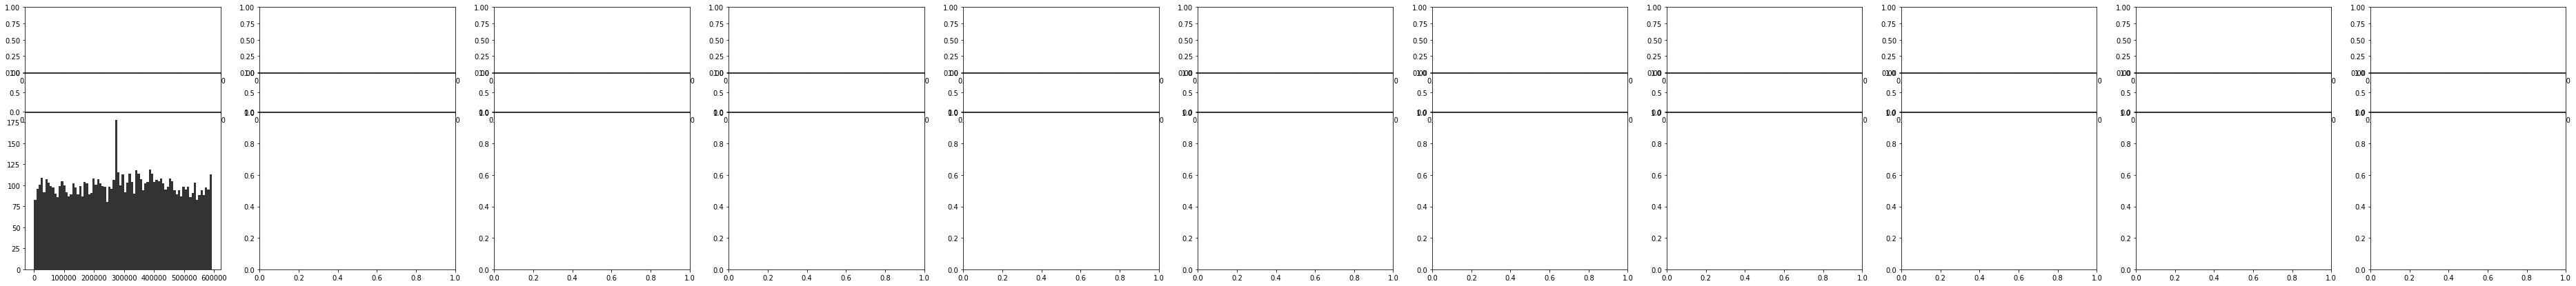

In [18]:
labelsize = 13
binsize = 250
% matplotlib inline
n_tot = np.zeros([len(cluster_ids),int(sweeplength/(binsize/1000)),len(amps)])
count=0
for r in cluster_ids[:1]:
    if r in responsive:
        print('cluster: ' + r + 'RESPONSIVE')
    elif r in non_responsive:
        print('cluster: ' + r + 'NON RESPONSIVE')
    else:
        print('cluster: ' + r + 'NO RESPONSE ASSIGNMENT')
    for var in baselines:
        print(var)
        selection_tmp = selection[(selection['cluster']== r)&(selection['basetemp']== int(var))]
        #print(selection_tmp)
        data_tmp = np.array(data[0])[list(np.where((selection['cluster']== r)&(selection['basetemp']== int(var)))[0])]
        
        if data_tmp.size <1:
            continue
        
        num_plots = int(np.max(selection_tmp.sweep_Id.values) +1)

        fig = plt.figure(figsize=(6*num_plots,7))
        ax1 = placeAxesOnGrid(fig,dim=[1,num_plots],yspan=[0,0.25])
        ax2 = placeAxesOnGrid(fig,dim=[1,num_plots],yspan=[0.25,0.4])
        ax3 = placeAxesOnGrid(fig,dim=[1,num_plots],yspan=[0.4,1])

        values = []
        for ii in range(num_plots):

        #ax3_2 = placeAxesOnGrid(fig,yspan=[0.6,1])

            times_cut = np.sort(data_tmp[ii][:,0])
            if len(times_cut) == 0:
                n = 0
                values.append(0)
                continue
            n = plot_PSTH_gaussian_manual(ax3[ii],selection_tmp.iloc[ii], times_cut,samplingrate=30000,
                                                                binsize = binsize,bandwidth= 150,start=0,
                                                                end=sweeplength,stepsize= 10)
            
            n_tot[count,:,ii] = n
            
            ax3[ii].set_xlabel(r'$time \/ [s]$',fontsize=labelsize)
            ax3[ii].set_ylabel(r'$spike \/ count$',fontsize=labelsize)
            ax3[ii].tick_params(axis='both',labelsize=labelsize)
            ax2[ii].tick_params(axis='both',labelsize=labelsize)
            ax1[ii].tick_params(axis='both',labelsize=labelsize)
            ax3[ii].spines['top'].set_visible(False)
            ax3[ii].spines['right'].set_visible(False)

            ax3[ii].axvline(selection_tmp.iloc[ii].pre*samplerate,lw= 1, ls='--',color = 'grey',alpha=0.5)
            ax2[ii].axvline(selection_tmp.iloc[ii].pre*samplerate,lw= 1, ls='--',color = 'grey',alpha=0.5)
            ax1[ii].axvline(selection_tmp.iloc[ii].pre*1000,lw= 1, ls='--',color = 'grey',alpha=0.5)

            ax3[ii].axvline(selection_tmp.iloc[ii].post*samplerate,lw= 1, ls='--',color = 'grey',alpha=0.5)
            ax2[ii].axvline(selection_tmp.iloc[ii].post*samplerate,lw= 1, ls='--',color = 'grey',alpha=0.5)
            ax1[ii].axvline(selection_tmp.iloc[ii].post*1000,lw= 1, ls='--',color = 'grey',alpha=0.5)


            values.append(n)
            data_raster=data_tmp[ii]
            cleanAxes(ax2[ii],total=True)
            plot_raster(data_raster,ax2[ii],trials)
            ax2[ii].set_xlim(0,sweeplength*samplerate)
            ax3[ii].set_xlim(0,sweeplength*samplerate)
            ax1[ii].set_xlim(0,sweeplength*1000)
            x_axis_tmp = np.arange(0,sweeplength*1000)
            
            if selection_tmp.iloc[ii].basetemp == 32:
                ax1[ii].plot(x_axis_tmp,amps[ii])

            elif selection_tmp.iloc[ii].basetemp == 26:
                ax1[ii].plot(x_axis_tmp,feedback_traces_26[ii])
            '''if selection_tmp.iloc[ii].basetemp == 32:

                target_inx = np.where(abs(amps[int(selection_tmp.iloc[ii].sweep_Id)]-selection.iloc[ii].basetemp/10) >= abs(selection.iloc[ii].stimtemp/10-selection.iloc[ii].basetemp/10))[0][0]


                ax1[ii].plot(x_axis_tmp,amps[int(selection_tmp.iloc[ii].sweep_Id)])
                ax3[ii].axvline(target_inx*30,lw= 0.6, ls='--',color = 'grey',alpha=0.5)
                ax2[ii].axvline(target_inx*30,lw= 0.6, ls='--',color = 'grey',alpha=0.5)
                ax1[ii].axvline(target_inx,lw= 0.6, ls='--',color = 'grey',alpha=0.5)


            elif selection_tmp.iloc[ii].basetemp == 26:

                target_inx = np.where(abs(feedback_traces_26[int(selection_tmp.iloc[ii].sweep_Id)]-selection_tmp.iloc[ii].basetemp/10)>= abs(selection.iloc[ii].stimtemp/10-selection.iloc[ii].basetemp/10))[0][0]

                ax1[ii].plot(x_axis_tmp,feedback_traces_26[int(selection_tmp.iloc[ii].sweep_Id)])
                ax3[ii].axvline(target_inx*30,lw= 0.6, ls='--',color = 'grey',alpha=0.5)
                ax2[ii].axvline(target_inx*30,lw= 0.6, ls='--',color = 'grey',alpha=0.5)
                ax1[ii].axvline(target_inx,lw= 0.6, ls='--',color = 'grey',alpha=0.5)'''

            cleanAxes(ax1[ii],total = True)
            ax1[ii].set_ylim(0.9,3.5)
            ax1[ii].set_yticks([selection_tmp.iloc[ii].stimtemp/10])
            ax1[ii].set_yticklabels([selection_tmp.iloc[ii].stimtemp])
            ax1[ii].set_title('cluster: {}, exp: {},animal: {} \n baselinetemp: {}°C, stimulustemp: {}°C'.format(selection_tmp.iloc[ii].cluster,selection_tmp.iloc[ii].expID,selection_tmp.iloc[ii].animal_id,selection_tmp.iloc[ii].basetemp,selection_tmp.iloc[ii].stimtemp))

        count +=1
        for ii in range(num_plots):
            try:
                ax3[ii].set_ylim(0,np.max(values))
            except:
                continue
        
        savefolder = os.path.join(wd,"Plots")
        savefolder1 = os.path.join(savefolder,"responsive")
        savefolder2 = os.path.join(savefolder,"non_responsive")

        
        if not os.path.isdir(savefolder):
            os.makedirs(savefolder)
        if not os.path.isdir(savefolder1):
            os.makedirs(savefolder1)
        if not os.path.isdir(savefolder2):
            os.makedirs(savefolder2)
            
        if r in responsive:
            plt.savefig(os.path.join(savefolder1,selection_tmp.iloc[ii].cluster.zfill(4)+'_'+selection_tmp.iloc[ii].expID+'_'+selection_tmp.iloc[ii].animal_id+'_'+str(selection_tmp.iloc[ii].basetemp)+'_'+str(selection_tmp.iloc[ii].stimtemp)+'.jpg'))
        elif r in non_responsive:
            plt.savefig(os.path.join(savefolder2,selection_tmp.iloc[ii].cluster.zfill(4)+'_'+selection_tmp.iloc[ii].expID+'_'+selection_tmp.iloc[ii].animal_id+'_'+str(selection_tmp.iloc[ii].basetemp)+'_'+str(selection_tmp.iloc[ii].stimtemp)+'.jpg'))            #plt.savefig(os.path.join(savefolder,selection_tmp.iloc[ii].cluster+'_'+selection_tmp.iloc[ii].expID+'_'+selection_tmp.iloc[ii].animal_id+'_'+str(selection_tmp.iloc[ii].basetemp)+'_'+str(selection_tmp.iloc[ii].stimtemp)+'.jpg'))
        #plt.show()
        #plt.close()

In [16]:
10/75

0.13333333333333333

In [14]:
"100".zfill(3)

'100'

In [ ]:
import seaborn as sns
sns.distplot(ps,bins=500)
plt.xlim(0,0.02)
plt.show()

In [ ]:
w, p = wilcoxon(np.array(stim_dist) - np.array(baseline_dist))

In [ ]:
sns.distplot(stim_dist, bins = 25)
sns.distplot(baseline_dist, bins = 25)
plt.show()

In [ ]:
np.sum(r_tmp[1,int(baseline_start*samplingrate):int(baseline_end*samplingrate)])

In [ ]:
w

In [ ]:
p